# Capstone code: close encouters of the 'big data' kind

In [20]:
%matplotlib inline

import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from auth_js import connection_string_js


In [14]:
# This script includes a function to query the database and return the list of table names,
# as well  a second function that accepts table name and number of rows as arguments 
# and prints a summary of the head of each table.

#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#This function prints the names of the tables 
def table_lister ():
    cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
    rows = cur.fetchall()
    for row in rows:
        print (row[0])

#This function prints columns and top rows from table, it accepts table name and number of rows as arguments.
def head_generator (table, limit):
    cur.execute("""SELECT * FROM %s LIMIT %s""" % (table, limit))
    col_names = [cn[0] for cn in cur.description]
    rows = cur.fetchall()
    print (table)
    print (col_names)
    for row in rows:
        print (row)
    print ('\n')
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
    #table_lister()
    head_generator('flows',5)
    head_generator('redteam',5)
    head_generator('dns',5)
    head_generator('proc',5)
    head_generator('auth',5)
    disconnect()

flows
['id', 'tstamp', 'duration', 'srccomputer', 'srcport', 'dstcomputer', 'dstport', 'protocol', 'packetcnt', 'bytecnt', 'redteam']
(1, 1, 0, 'C1065', '389', 'C3799', 'N10451', '6', '10', '5323', None)
(2, 1, 0, 'C1423', 'N1136', 'C1707', 'N1', '6', '5', '847', None)
(3, 1, 0, 'C1423', 'N1142', 'C1707', 'N1', '6', '5', '847', None)
(4, 1, 0, 'C14909', 'N8191', 'C5720', '2049', '6', '1', '52', None)
(5, 1, 0, 'C14909', 'N8192', 'C5720', '2049', '6', '1', '52', None)


redteam
['id', 'tstamp', 'userdomain', 'src', 'dst', 'usr', 'domain', 'redteam']
(261, '768556', 'U66@DOM1', 'C17693', 'C306', 'U66', 'DOM1', None)
(79, '736582', 'U2837@DOM1', 'C17693', 'C89', 'U2837', 'DOM1', None)
(80, '736894', 'U2837@DOM1', 'C17693', 'C1484', 'U2837', 'DOM1', None)
(81, '736936', 'U2837@DOM1', 'C17693', 'C8490', 'U2837', 'DOM1', None)
(82, '737011', 'U349@DOM1', 'C17693', 'C3601', 'U349', 'DOM1', None)


dns
['id', 'tstamp', 'srccomputer', 'computerresolved', 'redteam']
(130625, 195647, 'C16073', 'C

In [27]:
#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#Write up query in second line of this function. 
query_return_holder = []
def query_launcher (query):
    cur.execute("""%s""" % query)
    rows = cur.fetchall()
    for i in rows:
        query_return_holder.append(i)
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
    query_launcher("""SELECT * FROM redteam""")
    #disconnect()

In [28]:
df = pd.DataFrame(query_return_holder)
df.columns = ['id', 'tstamp', 'userdomain', 'src', 'dst', 'usr', 'domain', 'redteam']
#df.to_csv(path_or_buf='redteam.txt',delimiter=',')
df.head(100)

,id,tstamp,userdomain,src,dst,usr,domain,redteam
0,261,768556,U66@DOM1,C17693,C306,U66,DOM1,None
1,79,736582,U2837@DOM1,C17693,C89,U2837,DOM1,None
2,80,736894,U2837@DOM1,C17693,C1484,U2837,DOM1,None
3,81,736936,U2837@DOM1,C17693,C8490,U2837,DOM1,None
4,82,737011,U349@DOM1,C17693,C3601,U349,DOM1,None


In [33]:
#df.head(200)

In [36]:
df.tstamp.describe()

count         749
unique        712
top       1233528
freq           12
Name: tstamp, dtype: object

In [21]:
day_number = []
start_time = 1
day_label = 1
for i in range (60):
    end_time = start_time + 86399 #number of seconds in 24 hours
    i = [day_label,start_time,end_time]
    day_number.append(i)
    start_time = end_time + 1
    day_label = day_label + 1
#for i in day_number:
#    print (i)

In [58]:
day_updater = df.values.tolist()
for i in day_updater[0:5]:
    print (i)

[79, '736582', 'U2837@DOM1', 'C17693', 'C89', 'U2837', 'DOM1', None]
[80, '736894', 'U2837@DOM1', 'C17693', 'C1484', 'U2837', 'DOM1', None]
[81, '736936', 'U2837@DOM1', 'C17693', 'C8490', 'U2837', 'DOM1', None]
[82, '737011', 'U349@DOM1', 'C17693', 'C3601', 'U349', 'DOM1', None]


In [75]:
for i in day_updater[0:5]:
    print (i)

[261, '768556', 'U66@DOM1', 'C17693', 'C306', 'U66', 'DOM1', None]
[79, '736582', 'U2837@DOM1', 'C17693', 'C89', 'U2837', 'DOM1', None]
[80, '736894', 'U2837@DOM1', 'C17693', 'C1484', 'U2837', 'DOM1', None]
[81, '736936', 'U2837@DOM1', 'C17693', 'C8490', 'U2837', 'DOM1', None]
[82, '737011', 'U349@DOM1', 'C17693', 'C3601', 'U349', 'DOM1', None]


In [63]:
day_series = []

for x in range(749):
    for y in range(60):
        if int(day_updater[x][1]) > day_number[y][1] and int(day_updater[x][1]) < day_number[y][2]:
            day_series.append(day_number[y][0])
print (day_series)

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 13, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 

In [76]:
day_series = np.array(day_series)
day_series = pd.Series(day_series)
df['day'] = day_series
df.to_csv(path_or_buf='redteam.txt',delimiter=',')
df.head()

,id,tstamp,userdomain,src,dst,usr,domain,redteam,day
0,261,768556,U66@DOM1,C17693,C306,U66,DOM1,None,9
1,79,736582,U2837@DOM1,C17693,C89,U2837,DOM1,None,9
2,80,736894,U2837@DOM1,C17693,C1484,U2837,DOM1,None,9
3,81,736936,U2837@DOM1,C17693,C8490,U2837,DOM1,None,9
4,82,737011,U349@DOM1,C17693,C3601,U349,DOM1,None,9


In [78]:
df['day'].mode()

0    9
dtype: int64

In [15]:
count = 0
for i in df['day']:
    if i == 9:
        count = count + 1
print (count)

273


Having labeled the redteam incidents within 24 hr periods, the distribution of the exercises can be visualized. As indicated above, approximately a third of the incidents occur within one 24 hour period (day 9). The data is much too large to pull down and wrangle in local memory, so pullingn this single day may be an effective way to slice our data, i.e. this would trim 29 of the 30 days of log data from our set ~97% of the data set, but only about ~63% of our target data. 

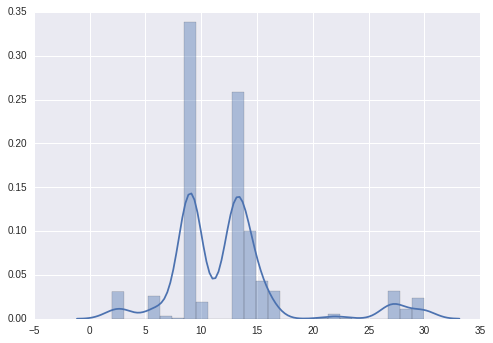

In [19]:
day_visual = np.array(df['day'])
sns.distplot(day_visual)

In anticipation of 24 hours being too much data, we did a further breakdown of our target event by hour to find the most dense hour of redteam exercises.

In [22]:
day_hour_number = []
for x in range(60):
    hour_number = []
    start_time = day_number[x][1]
    hour_label = 1
    for y in range (24):
        end_time = start_time + 3599 #number of seconds in 1 hour
        y = [day_number[x][0],hour_label,start_time,end_time]
        day_hour_number.append(y)
        start_time = end_time + 1
        hour_label = hour_label + 1

#for i in day_hour_number:
#    print (i)

In [58]:
for i in day_hour_number:
    if day_hour_number[0]==9:
        print (i)

In [41]:
hour_series = []

for x in range(749):
    for y in range(1440):
        if int(hour_updater[x][2]) >= day_hour_number[y][2] and int(hour_updater[x][2]) < day_hour_number[y][3]:
            hour_series.append(day_hour_number[y][1])
print (hour_series)

[22, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 23, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 9, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 15, 15, 15, 15, 

In [37]:
hour_series = np.array(hour_series)
hour_series = pd.Series(hour_series)
df['hour_cyclical'] = hour_series
#df.to_csv(path_or_buf='redteam.txt',delimiter=',')
df.head()

,Unnamed: 0,id,tstamp,userdomain,src,dst,usr,domain,redteam,day,hour_cyclical
0,0,261,768556,U66@DOM1,C17693,C306,U66,DOM1,NaN,9,22.0
1,1,79,736582,U2837@DOM1,C17693,C89,U2837,DOM1,NaN,9,13.0
2,2,80,736894,U2837@DOM1,C17693,C1484,U2837,DOM1,NaN,9,13.0
3,3,81,736936,U2837@DOM1,C17693,C8490,U2837,DOM1,NaN,9,13.0
4,4,82,737011,U349@DOM1,C17693,C3601,U349,DOM1,NaN,9,13.0


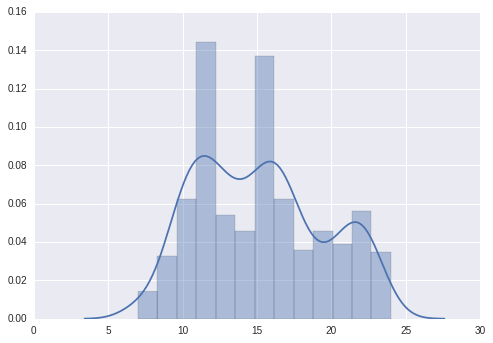

In [42]:
hour_series = np.array(hour_series)
hour_visual = np.array(hour_series)
sns.distplot(hour_visual)

In [50]:
hour_encoded = []
for x in range(748):
    concatenator = str(df['day'][x]) + str(df['hour_cyclical'][x])
    floaterator = float(concatenator)
    hour_encoded.append(floaterator)
    
    
print (hour_encoded)

[922.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 913.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 914.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 915.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 916.0, 917.0, 917.0, 917.0, 917.0, 917.0, 917.0, 917.0, 917.0, 917.0, 917.0, 917.0, 918.0, 918.0, 918.0, 918.0, 918.0, 918.0, 918.0, 918.0, 918.0, 918.0, 919.0, 919.0, 919.0, 919.0, 919.0, 919.0, 919.0, 919.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 920.0, 923.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0, 921.0

In [52]:
hour_encoded = np.array(hour_encoded)
hour_encoded = pd.Series(hour_encoded)
df['hour_encoded'] = hour_encoded
df.to_csv(path_or_buf='redteam.txt',delimiter=',')
df.head()

,Unnamed: 0,id,tstamp,userdomain,src,dst,usr,domain,redteam,day,hour_cyclical,hour_encoded
0,0,261,768556,U66@DOM1,C17693,C306,U66,DOM1,NaN,9,22.0,922.0
1,1,79,736582,U2837@DOM1,C17693,C89,U2837,DOM1,NaN,9,13.0,913.0
2,2,80,736894,U2837@DOM1,C17693,C1484,U2837,DOM1,NaN,9,13.0,913.0
3,3,81,736936,U2837@DOM1,C17693,C8490,U2837,DOM1,NaN,9,13.0,913.0
4,4,82,737011,U349@DOM1,C17693,C3601,U349,DOM1,NaN,9,13.0,913.0


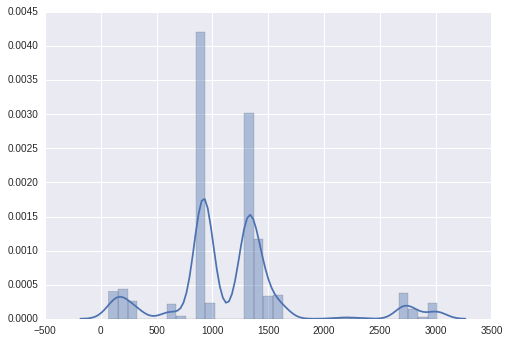

In [53]:
hour_encoded = np.array(hour_encoded)
hour_visual = np.array(hour_encoded)
sns.distplot(hour_visual)

In [55]:
df['hour_encoded'].mode()

0    922.0
dtype: float64

In [56]:
count = 0
for i in df['hour_encoded']:
    if i == 922.0:
        count = count + 1
print (count)

55


The most dense hour of activity was the 22nd hour of day 9, the tstamp parameters for this period were 766801 and 770400.

# Pull and store auth data for target day

Unfortunately even pulling one day's worth of data from our authorization log data still throws a memory error, indicating the query return is too large. 

In [ ]:
#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#Write up query in second line of this function. 
query_return_holder = []
def query_launcher (query):
    cur.execute("""%s""" % query)
    rows = cur.fetchall()
    for i in rows:
        query_return_holder.append(i)
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
#   query_launcher("""SELECT * FROM auth WHERE tstamp >= 691201 AND tstamp <= 777600""")
    #disconnect()

df = pd.DataFrame(query_return_holder)
df.columns = ['id', 'tstamp', 'srcuserdomain', 'dstuserdomain', 'srccomputer', 'dstcomputer', 'authtype', 'logontype', 'authorient', 'passfail', 'srcusr', 'srcdomain', 'dstusr', 'dstdomain', 'redteam']
df.to_csv(path_or_buf='auth.txt',delimiter=',')
df.head(100)

So we'll try again, and just try to pull one hour of data.

In [61]:
#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#Write up query in second line of this function. 
query_return_holder = []
def query_launcher (query):
    cur.execute("""%s""" % query)
    rows = cur.fetchall()
    for i in rows:
        query_return_holder.append(i)
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
    query_launcher("""SELECT * FROM auth WHERE tstamp >= 766801 AND tstamp <= 770400""")
    #disconnect()

df = pd.DataFrame(query_return_holder)
df.columns = ['id', 'tstamp', 'srcuserdomain', 'dstuserdomain', 'srccomputer', 'dstcomputer', 'authtype', 'logontype', 'authorient', 'passfail', 'srcusr', 'srcdomain', 'dstusr', 'dstdomain', 'redteam']
df.to_csv(path_or_buf='auth.txt',delimiter=',')
df.head(100)

,id,tstamp,srcuserdomain,dstuserdomain,srccomputer,dstcomputer,authtype,logontype,authorient,passfail,srcusr,srcdomain,dstusr,dstdomain,redteam
0,150874437,768556,U66@DOM1,U66@DOM1,C17693,C306,NTLM,Network,LogOn,Success,U66,DOM1,U66,DOM1,RED
1,150552528,766808,U199@?,U199@?,C1929,C1929,?,?,TGT,Fail,U199,?,U199,?,None
2,150551209,766801,U1382@DOM1,U1382@DOM1,C22251,C1065,?,?,TGS,Success,U1382,DOM1,U1382,DOM1,None
3,150551624,766803,U3@DOM1,U3@DOM1,C1,C612,?,?,TGS,Success,U3,DOM1,U3,DOM1,None
4,150551290,766801,U78@DOM1,U78@DOM1,C1727,C1727,?,?,TGT,Success,U78,DOM1,U78,DOM1,None
5,150551103,766801,ANONYMOUS LOGON@C1065,ANONYMOUS LOGON@C1065,C1065,C1065,?,Network,LogOff,Success,ANONYMOUS LOGON,C1065,ANONYMOUS LOGON,C1065,None
6,150551104,766801,ANONYMOUS LOGON@C1065,ANONYMOUS LOGON@C1065,C22251,C1065,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C1065,ANONYMOUS LOGON,C1065,None
7,150551105,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C119,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,None
8,150551106,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C16397,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,None
9,150551107,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C1645,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,None


In [62]:
df.describe()

,id,tstamp
count,6.423510e+05,642351.000000
mean,1.508723e+08,768558.230885
std,1.854309e+05,1042.190148
min,1.505511e+08,766801.000000
25%,1.507117e+08,767631.000000
50%,1.508723e+08,768547.000000
75%,1.510329e+08,769452.000000
max,1.511935e+08,770400.000000


Execute again to write flows to disk.

In [67]:
#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#Write up query in second line of this function. 
query_return_holder = []
def query_launcher (query):
    cur.execute("""%s""" % query)
    rows = cur.fetchall()
    for i in rows:
        query_return_holder.append(i)
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
    query_launcher("""SELECT * FROM flows WHERE tstamp >= 766801 AND tstamp <= 770400""")
    #disconnect()

df = pd.DataFrame(query_return_holder)
df.columns = ['id', 'tstamp', 'duration', 'srccomputer', 'srcport', 'dstcomputer', 'dstport', 'protocol', 'packetcnt', 'bytecnt', 'redteam']
df.to_csv(path_or_buf='flows.txt',delimiter=',')
df.head(100)

,id,tstamp,duration,srccomputer,srcport,dstcomputer,dstport,protocol,packetcnt,bytecnt,redteam
0,77749687,766801,0,C12181,N661,C5721,139,6,2,94,None
1,77749688,766801,0,C14049,N1871,C529,445,6,1,52,None
2,77749689,766801,0,C14483,N431,C1707,N15,6,102,4817,None
3,77749690,766801,0,C1654,80,C20987,N15891,6,2,1034,None
4,77749691,766801,0,C16675,N3890,C1685,N15,6,6,922,None
5,77749692,766801,0,C1685,N15,C16675,N3890,6,4,445,None
6,77749693,766801,0,C1685,N15,C23804,N15208,6,4,2638,None
7,77749694,766801,0,C1707,N15,C14483,N431,6,182,247732,None
8,77749695,766801,0,C23804,N15208,C1685,N15,6,6,1210,None
9,77749696,766801,0,C25374,N1870,C2668,N1869,6,1,187,None


Execute again to write dns to disk.

In [68]:
#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#Write up query in second line of this function. 
query_return_holder = []
def query_launcher (query):
    cur.execute("""%s""" % query)
    rows = cur.fetchall()
    for i in rows:
        query_return_holder.append(i)
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
    query_launcher("""SELECT * FROM dns WHERE tstamp >= 766801 AND tstamp <= 770400""")
    #disconnect()

df = pd.DataFrame(query_return_holder)
df.columns = ['id', 'tstamp', 'srccomputer', 'computerresolved', 'redteam']
df.to_csv(path_or_buf='dns.txt',delimiter=',')
df.head(100)

,id,tstamp,srccomputer,computerresolved,redteam
0,530689,766801,C18250,C1065,None
1,530690,766802,C18184,C18184,None
2,530691,766802,C18250,C2109,None
3,530692,766802,C18250,C467,None
4,530693,766802,C24885,C1685,None
5,530694,766802,C3664,C5030,None
6,530695,766802,C5782,C16712,None
7,530696,766802,C657,C568,None
8,530697,766803,C18250,C528,None
9,530698,766803,C18250,C586,None


...and again for proc...

In [69]:
#Connect to rds
try:
    conn = psycopg2.connect(connection_string_js)
except:
    print ("\n_________CONNECTION FAILURE_________\n")
cur = conn.cursor()

#Write up query in second line of this function. 
query_return_holder = []
def query_launcher (query):
    cur.execute("""%s""" % query)
    rows = cur.fetchall()
    for i in rows:
        query_return_holder.append(i)
    
#disconnect from DB
def disconnect():
    cur.close()
    conn.close()

if __name__ == '__main__':
    query_launcher("""SELECT * FROM proc WHERE tstamp >= 766801 AND tstamp <= 770400""")
    #disconnect()

df = pd.DataFrame(query_return_holder)
df.columns = ['id', 'tstamp', 'compdomain', 'computer', 'processname', 'startend', 'comp', 'domain', 'redteam', 'session']
df.to_csv(path_or_buf='proc.txt',delimiter=',')
df.head(100)

,id,tstamp,compdomain,computer,processname,startend,comp,domain,redteam,session
0,57612804,766801,C10340$@DOM1,C10340,P5,Start,C10340,DOM1,None,None
1,57612805,766801,C10340$@DOM1,C10340,P7,Start,C10340,DOM1,None,None
2,57612806,766801,C10340$@DOM1,C10340,P8,Start,C10340,DOM1,None,None
3,57612807,766801,C10403$@DOM1,C10403,P8,Start,C10403,DOM1,None,None
4,57612808,766801,C10432$@DOM1,C10432,P8,Start,C10432,DOM1,None,None
5,57612809,766801,C1065$@DOM1,C1065,P351,Start,C1065,DOM1,None,None
6,57612810,766801,C1065$@DOM1,C1065,P5,Start,C1065,DOM1,None,None
7,57612811,766801,C1065$@DOM1,C1065,P594,Start,C1065,DOM1,None,None
8,57612812,766801,C1065$@DOM1,C1065,P595,Start,C1065,DOM1,None,None
9,57612813,766801,C1065$@DOM1,C1065,P8,Start,C1065,DOM1,None,None


# Wrangle Data, Create Bunch Object

Now that the sample data is saved to disc, i'll read each file in as a dataframe.

In [23]:
df_auth = pd.read_csv('auth.txt')
df_flows = pd.read_csv('flows.txt')
df_dns = pd.read_csv('dns.txt')
df_proc = pd.read_csv('proc.txt')

/home/merlinuser/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df_auth.head()

,Unnamed: 0,id,tstamp,compdomain,computer,processname,startend,comp,domain,redteam,session
0,0,57612804,766801,C10340$@DOM1,C10340,P5,Start,C10340,DOM1,NaN,NaN
1,1,57612805,766801,C10340$@DOM1,C10340,P7,Start,C10340,DOM1,NaN,NaN
2,2,57612806,766801,C10340$@DOM1,C10340,P8,Start,C10340,DOM1,NaN,NaN
3,3,57612807,766801,C10403$@DOM1,C10403,P8,Start,C10403,DOM1,NaN,NaN
4,4,57612808,766801,C10432$@DOM1,C10432,P8,Start,C10432,DOM1,NaN,NaN


In [25]:
df_flows.head()

,Unnamed: 0,id,tstamp,duration,srccomputer,srcport,dstcomputer,dstport,protocol,packetcnt,bytecnt,redteam
0,0,77749687,766801,0,C12181,N661,C5721,139,6,2,94,NaN
1,1,77749688,766801,0,C14049,N1871,C529,445,6,1,52,NaN
2,2,77749689,766801,0,C14483,N431,C1707,N15,6,102,4817,NaN
3,3,77749690,766801,0,C1654,80,C20987,N15891,6,2,1034,NaN
4,4,77749691,766801,0,C16675,N3890,C1685,N15,6,6,922,NaN


In [26]:
df_dns.head()

,Unnamed: 0,id,tstamp,srccomputer,computerresolved,redteam
0,0,530689,766801,C18250,C1065,NaN
1,1,530690,766802,C18184,C18184,NaN
2,2,530691,766802,C18250,C2109,NaN
3,3,530692,766802,C18250,C467,NaN
4,4,530693,766802,C24885,C1685,NaN


In [35]:
df_auth.head(5)

,Unnamed: 0,id,tstamp,srcuserdomain,dstuserdomain,srccomputer,dstcomputer,authtype,logontype,authorient,passfail,srcusr,srcdomain,dstusr,dstdomain,redteam
0,0,150874437,768556,U66@DOM1,U66@DOM1,C17693,C306,NTLM,Network,LogOn,Success,U66,DOM1,U66,DOM1,RED
1,1,150552528,766808,U199@?,U199@?,C1929,C1929,?,?,TGT,Fail,U199,?,U199,?,NaN
2,2,150551209,766801,U1382@DOM1,U1382@DOM1,C22251,C1065,?,?,TGS,Success,U1382,DOM1,U1382,DOM1,NaN
3,3,150551624,766803,U3@DOM1,U3@DOM1,C1,C612,?,?,TGS,Success,U3,DOM1,U3,DOM1,NaN
4,4,150551290,766801,U78@DOM1,U78@DOM1,C1727,C1727,?,?,TGT,Success,U78,DOM1,U78,DOM1,NaN


In [43]:
#df_auth.head(-5) #for some reason df_auth.shape() keeps throwing an error, .head() method give the shape though

642346

### Address Missing Values

Update dataframe to fill out the NaN values in redteam column.

In [64]:
df_auth.fillna(value='VALID',inplace=True)

In [67]:
df_auth.head()

,Unnamed: 0,id,tstamp,srcuserdomain,dstuserdomain,srccomputer,dstcomputer,authtype,logontype,authorient,passfail,srcusr,srcdomain,dstusr,dstdomain,redteam
0,0,150874437,768556,U66@DOM1,U66@DOM1,C17693,C306,NTLM,Network,LogOn,Success,U66,DOM1,U66,DOM1,RED
6,6,150551104,766801,ANONYMOUS LOGON@C1065,ANONYMOUS LOGON@C1065,C22251,C1065,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C1065,ANONYMOUS LOGON,C1065,VALID
7,7,150551105,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C119,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,VALID
8,8,150551106,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C16397,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,VALID
9,9,150551107,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C1645,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,VALID


Drop all the missing values, which were encoded with '?'.

In [44]:
df_auth = df_auth[df_auth.authtype != '?']

In [50]:
#df_auth.head() #for some reason df_auth.shape() keeps throwing an error, .head() method give the shape though

Row count = 278285

In [68]:
count = 0
for i in df_auth['redteam']:
    if i== 'RED':
        count = count +1
print (count)

48


Save cleaned data to disc.

In [75]:
df_auth.to_csv('auth_clean.txt')

Save cleaned data with column lables and index stripped out do disc.

### Encode Categorical

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
df = pd.read_csv('auth_clean.txt')

In [88]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,tstamp,srcuserdomain,dstuserdomain,srccomputer,dstcomputer,authtype,logontype,authorient,passfail,srcusr,srcdomain,dstusr,dstdomain,redteam
0,0,0,150874437,768556,U66@DOM1,U66@DOM1,C17693,C306,NTLM,Network,LogOn,Success,U66,DOM1,U66,DOM1,RED
1,6,6,150551104,766801,ANONYMOUS LOGON@C1065,ANONYMOUS LOGON@C1065,C22251,C1065,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C1065,ANONYMOUS LOGON,C1065,VALID
2,7,7,150551105,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C119,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,VALID
3,8,8,150551106,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C16397,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,VALID
4,9,9,150551107,766801,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C1645,C586,NTLM,Network,LogOn,Success,ANONYMOUS LOGON,C586,ANONYMOUS LOGON,C586,VALID


Strip non-useful columns.

In [89]:
cols_to_drop = [ 'Unnamed: 0', 'Unnamed: 0.1', 'id', 'tstamp','srcusr','srcdomain','dstusr','dstdomain']
df = df.drop(cols_to_drop, axis = 1)

In [90]:
df.head()

,srcuserdomain,dstuserdomain,srccomputer,dstcomputer,authtype,logontype,authorient,passfail,redteam
0,U66@DOM1,U66@DOM1,C17693,C306,NTLM,Network,LogOn,Success,RED
1,ANONYMOUS LOGON@C1065,ANONYMOUS LOGON@C1065,C22251,C1065,NTLM,Network,LogOn,Success,VALID
2,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C119,C586,NTLM,Network,LogOn,Success,VALID
3,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C16397,C586,NTLM,Network,LogOn,Success,VALID
4,ANONYMOUS LOGON@C586,ANONYMOUS LOGON@C586,C1645,C586,NTLM,Network,LogOn,Success,VALID


Save cleaned data to disc with header and index stripped out.

In [91]:
df.to_csv('auth_clean_stripped.txt',header=False, index=False)

Check data type.

In [94]:
g = df.columns.to_series().groupby(df.dtypes).groups
print (g)

{dtype('O'): ['srcuserdomain', 'dstuserdomain', 'srccomputer', 'dstcomputer', 'authtype', 'logontype', 'authorient', 'passfail', 'redteam']}


Need to encode these categorical variables.

In [95]:
from sklearn.feature_extraction import DictVectorizer as DV

In [97]:
#Tried using DictVectorizer

# convert to dictionary
#dict_df = df.T.to_dict().values()
# vectorize
#vectorizer = DV( sparse = False )
#vec_df = vectorizer.fit_transform( df )

In [93]:
import json 

meta = {
    'target_names': list(df.redteam.unique()),
    'feature_names': list(df.columns),
    'categorical_features': {
        column: list(df[column].unique())
        for column in df.columns
        if df[column].dtype == 'object'
    },
}

with open('meta.json', 'w') as f:
    json.dump(meta, f, indent=2)

In [ ]:
Tried to just use pandas to dummy-out the data...memory error.

In [100]:
df_dummied = pd.get_dummies(df)

MemoryError: 

In [ ]:
def load_data(root=os.getcwd()):
    # Construct the `Bunch` for the Phishing dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        #'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'Training_Dataset1.txt'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']
        
    #Alternative method for loading in target and featur labels.
    #target_names  = df.columns[-1]
    #feature_names = list(df.columns[0:-1])

    # Load the description from the README. 
    #with open(filenames['rdme'], 'r') as f:
    #    DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.genfromtxt(filenames['data'], delimiter=',')
        
    # Extract the target from the data
    data   = dataset[:, 0:-1]
    target = dataset[:, -1]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print (dataset.data.shape)
print (dataset.target.shape)

# Fit Estimator

In [ ]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.ensemble import RandomForestClassifier

In [ ]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted,pos_label=2))
        scores['recall'].append(metrics.recall_score(expected, predicted,pos_label=2))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted,pos_label=2))

    # Report
    print ("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print ("Validation scores are as follows:\n")
    print (pd.DataFrame(scores).mean())
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print ("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

In [ ]:
fit_and_evaluate(dataset, RandomForestClassifier, "Network Data Random Forest Classifier")